In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load data from disk

In [2]:
# load raw data
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Prepare data. Perform 70/30 train test split. Perform scaling to help normalize data

In [3]:
# Set features and data
y = df["koi_disposition"]
X = df.drop(columns=['koi_disposition'])

In [6]:
# perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                    random_state=42)

In [8]:
# scale data
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# Encode categorical labels into numeric endpoints (e.g. 0, 1, 2)
le = LabelEncoder().fit(["FALSE POSITIVE","CANDIDATE","CONFIRMED"])
y_test_scaled = le.transform(y_test)
y_train_scaled = le.transform(y_train)

# Explore KNN Model

## Find optimal number of clusters

In [13]:
x_axis = []
score = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train_scaled)
    
    x_axis.append(i)
    score.append(knn.score(X_test_scaled,y_test_scaled))

Text(0.5, 0, 'Number of Clusters')

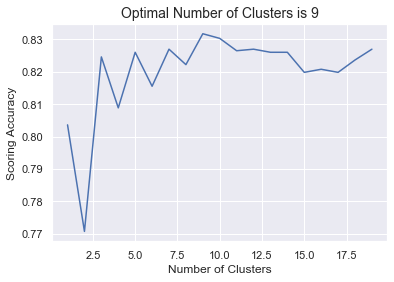

In [18]:
plt.plot(x_axis,score)
plt.title("Optimal Number of Clusters is 9", fontsize=14)
plt.ylabel("Scoring Accuracy")
plt.xlabel("Number of Clusters")

In [19]:
# load highest accuracy
knn = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled,y_train_scaled)
# make predictions
predictions = knn.predict(X_test_scaled)

# display accuracy statistics for model
from sklearn.metrics import classification_report
print(classification_report(y_test_scaled, predictions,
                            target_names=["FALSE POSITIVE","CANDIDATE","CONFIRMED"]))

                precision    recall  f1-score   support

FALSE POSITIVE       0.70      0.62      0.65       504
     CANDIDATE       0.71      0.79      0.75       574
     CONFIRMED       0.97      0.96      0.97      1020

      accuracy                           0.83      2098
     macro avg       0.79      0.79      0.79      2098
  weighted avg       0.83      0.83      0.83      2098



# Save model to be used later in other notebooks

In [21]:
import pickle

filename = 'planets_knn_model.sav'
pickle.dump(knn, open(filename, 'wb'))